In [198]:
import pandas as pd
df = pd.read_csv('/Users/kaiyang/Desktop/employeedata.csv')
df.rename(columns={'id': 'ID', 'gender': "Gender",
                    'bdate': 'Bdate', 'educ': 'Educ', 
                    'jobcat': 'Jobcat','salary':'Salary','salbegin':'Salbegin','jobtime':'Jobtime','prevexp':'Prevexp','minority':'Minority'}, inplace=True)
df['Gender'] = np.where(df['Gender'] == "m", 1, 0) # df['Gender'] = df['Gender'].astype(int)
df = df.drop(columns=['Bdate'])
df.head()

,ID,Gender,Educ,Jobcat,Salary,Salbegin,Jobtime,Prevexp,Minority
0,1,1,15,3,57000,27000,98,144,0
1,2,1,16,1,40200,18750,98,36,0
2,3,0,12,1,21450,12000,98,381,0
3,4,0,8,1,21900,13200,98,190,0
4,5,1,15,1,45000,21000,98,138,0


In [200]:
import statsmodels.api as sm
Y = df['Salary']
X = df['Salbegin']
X.head()

0    27000
1    18750
2    12000
3    13200
4    21000
Name: Salbegin, dtype: int64

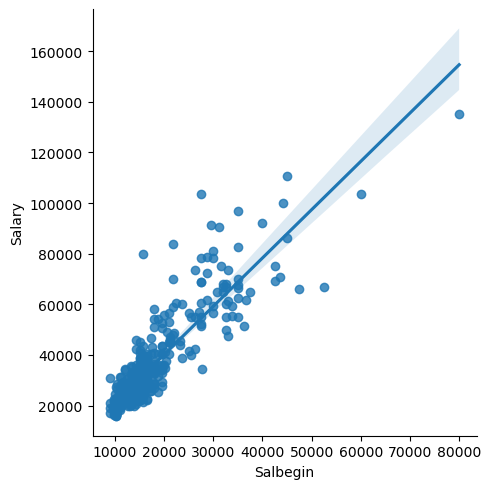

In [208]:
# Optional step for our own reference! 
import seaborn as sns

sns.lmplot(x="Salbegin", y="Salary", data=df)
ax.set_title("Educational level vs. Salary")
ax.set_xlabel("educational attainment");

In [202]:
X = sm.add_constant(X)
X.head()

,const,Salbegin
0,1.0,27000
1,1.0,18750
2,1.0,12000
3,1.0,13200
4,1.0,21000


In [204]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1622.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          8.20e-155
Time:                        19:52:19   Log-Likelihood:                -4938.3
No. Observations:                 474   AIC:                             9881.
Df Residuals:                     472   BIC:                             9889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1928.2058    888.680      2.170      0.031     181.947    3674.464
Salbegin       1.9094      0.047     40.276      0.000       1.816       2.003
==============================================================================
Omnibus:                      199.258   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1534.909
Skew:                           1.630   Prob(JB):                         0.00
Kurtosis:                      11.191   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

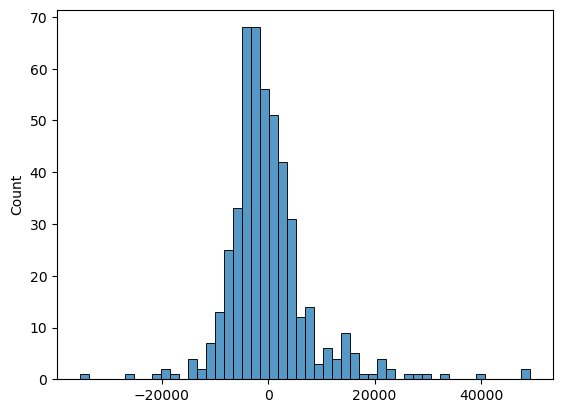

In [206]:
import seaborn as sns
sns.histplot(model_result.resid);

In [210]:
from scipy import stats
mu, std = stats.norm.fit(model_result.resid)
mu, std

(2.701621392608192e-12, 8098.216541458656)

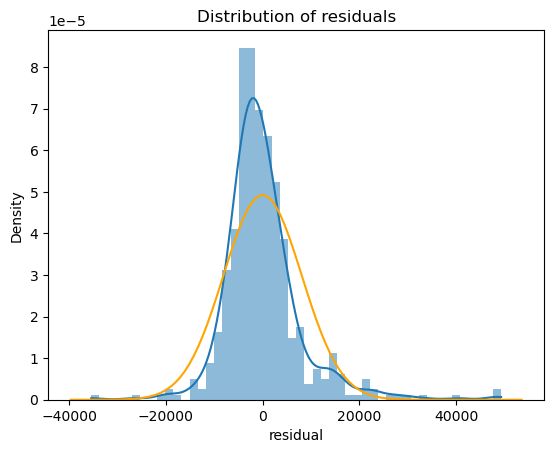

In [212]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

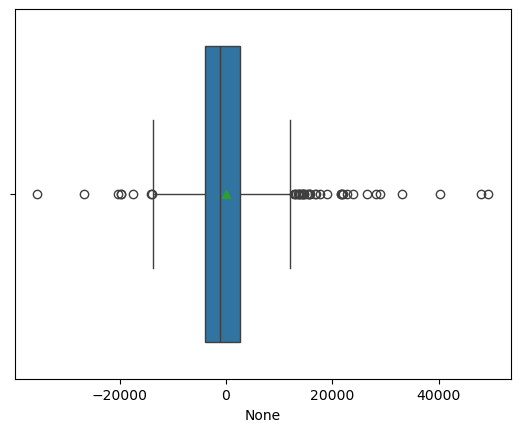

In [214]:
sns.boxplot(x=model_result.resid, showmeans=True);

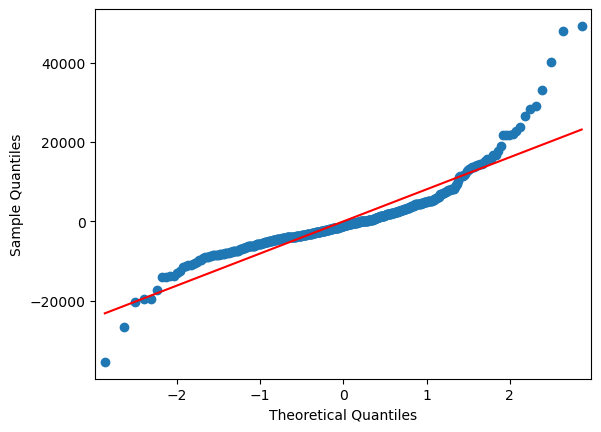

In [216]:
sm.qqplot(model_result.resid, line='s');

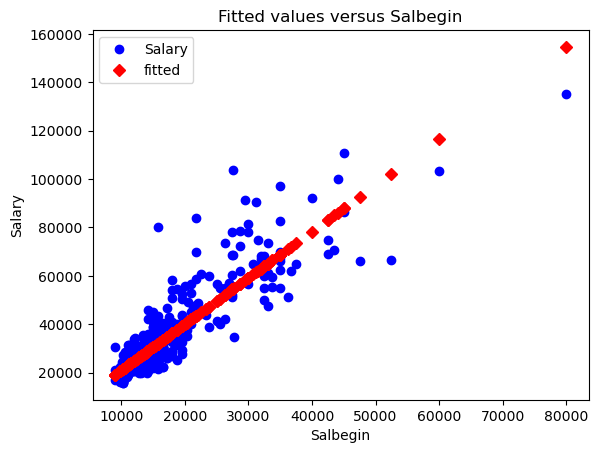

In [218]:
sm.graphics.plot_fit(model_result,1, vlines=False);

In [ ]:
model_result.fittedvalues
